In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Use subset for faster execution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define base regressors
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "KNN Regressor": KNeighborsRegressor(),
    "Linear Regression": LinearRegression()
}

# Store results
results = []

for name, model in models.items():
    # Base model
    model.fit(X_train, y_train)
    y_pred_base = model.predict(X_test)
    
    # Bagging model
    bag_model = BaggingRegressor(estimator=model, n_estimators=50, random_state=42)
    bag_model.fit(X_train, y_train)
    y_pred_bag = bag_model.predict(X_test)
    
    # Calculate metrics
    base_mse = mean_squared_error(y_test, y_pred_base)
    bag_mse = mean_squared_error(y_test, y_pred_bag)
    base_r2 = r2_score(y_test, y_pred_base)
    bag_r2 = r2_score(y_test, y_pred_bag)
    
    results.append((name, base_mse, bag_mse, base_r2, bag_r2))
    

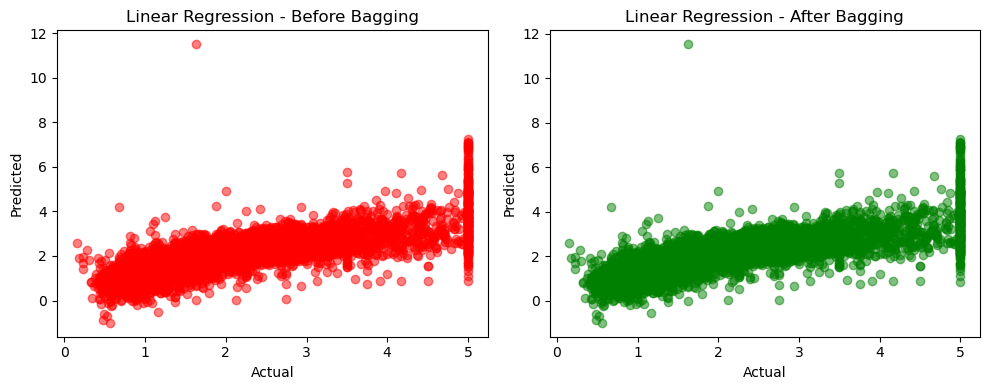

In [4]:

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.scatter(y_test, y_pred_base, color='red', alpha=0.5)
    plt.title(f"{name} - Before Bagging")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    
    plt.subplot(1,2,2)
    plt.scatter(y_test, y_pred_bag, color='green', alpha=0.5)
    plt.title(f"{name} - After Bagging")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.tight_layout()
    plt.show()

In [5]:
# --- Display Results ---
print(f"{'Model':<20}{'Base MSE':<15}{'Bagging MSE':<15}{'Base R2':<12}{'Bagging R2':<12}")
print("-"*70)
for r in results:
    print(f"{r[0]:<20}{r[1]:<15.4f}{r[2]:<15.4f}{r[3]:<12.4f}{r[4]:<12.4f}")

Model               Base MSE       Bagging MSE    Base R2     Bagging R2  
----------------------------------------------------------------------
Decision Tree       0.5280         0.2579         0.5977      0.8035      
KNN Regressor       1.1369         1.1021         0.1338      0.1603      
Linear Regression   0.5306         0.5305         0.5958      0.5958      


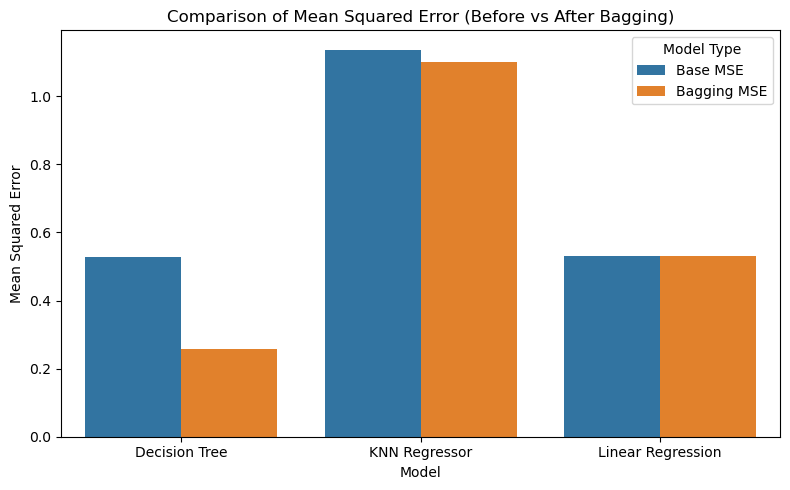

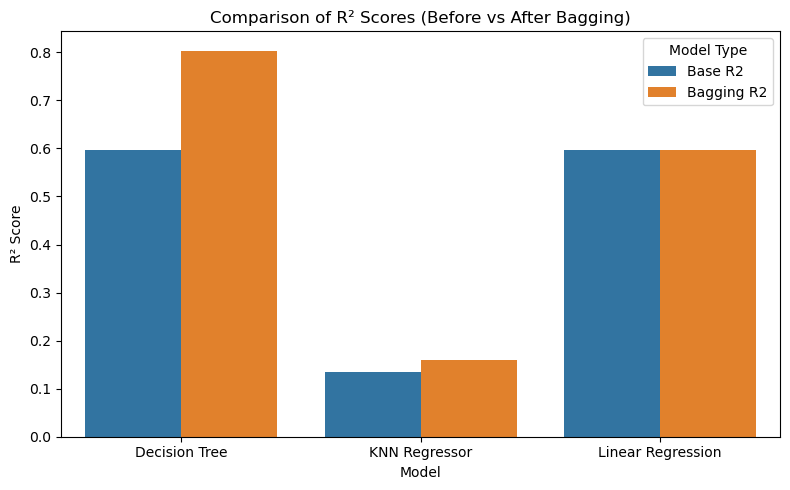

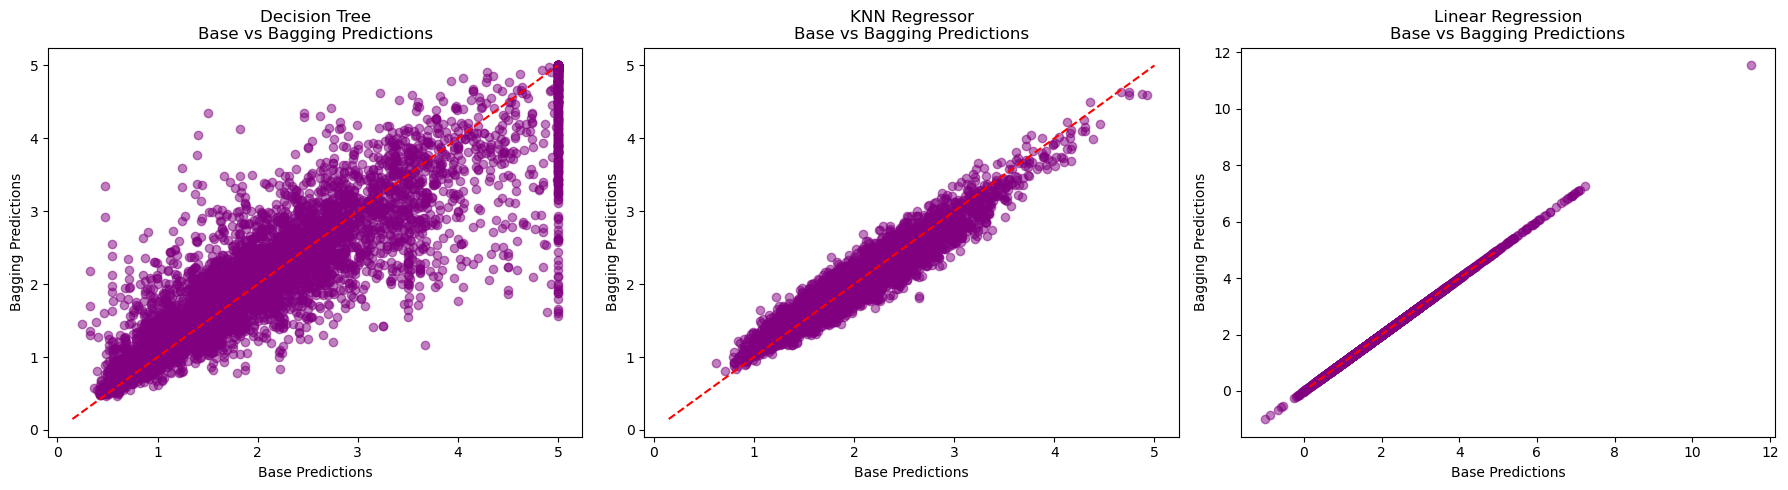

In [6]:
# --- Compare all models visually ---
import seaborn as sns
import pandas as pd

# Prepare data for plotting
results_df = pd.DataFrame(results, columns=["Model", "Base MSE", "Bagging MSE", "Base R2", "Bagging R2"])

# --- 1️⃣ Bar plot: MSE comparison ---
plt.figure(figsize=(8,5))
results_df_melted = results_df.melt(id_vars="Model", value_vars=["Base MSE", "Bagging MSE"], var_name="Type", value_name="MSE")
sns.barplot(x="Model", y="MSE", hue="Type", data=results_df_melted)
plt.title("Comparison of Mean Squared Error (Before vs After Bagging)")
plt.xlabel("Model")
plt.ylabel("Mean Squared Error")
plt.legend(title="Model Type")
plt.tight_layout()
plt.show()

# --- 2️⃣ Bar plot: R² comparison ---
plt.figure(figsize=(8,5))
results_df_r2 = results_df.melt(id_vars="Model", value_vars=["Base R2", "Bagging R2"], var_name="Type", value_name="R2 Score")
sns.barplot(x="Model", y="R2 Score", hue="Type", data=results_df_r2)
plt.title("Comparison of R² Scores (Before vs After Bagging)")
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.legend(title="Model Type")
plt.tight_layout()
plt.show()

# --- 3️⃣ Scatter comparison: Combined view ---
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
for i, (name, model) in enumerate(models.items()):
    bag_model = BaggingRegressor(estimator=model, n_estimators=50, random_state=42)
    bag_model.fit(X_train, y_train)
    y_pred_base = model.predict(X_test)
    y_pred_bag = bag_model.predict(X_test)
    
    axs[i].scatter(y_pred_base, y_pred_bag, alpha=0.5, color='purple')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    axs[i].set_title(f"{name}\nBase vs Bagging Predictions")
    axs[i].set_xlabel("Base Predictions")
    axs[i].set_ylabel("Bagging Predictions")

plt.tight_layout()
plt.show()
